In [492]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import re

In [493]:
mpl.rc('font',family='Malgun Gothic')

In [494]:
df1 = pd.read_csv('web_crawling_data2.csv',encoding='cp949')
df1.head()

,Unnamed: 0,Unnamed: 0.1,직종,재직여부,지역,작성시간,Label,한줄평,기업장점,기업단점,바라는점,기업성장여부,기업추천여부
0,0,0,경영/기획/컨설팅,현직원,서울,2019. 01. 03,성장,무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안에...,"1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...",빠르게 성장하는회사의 특징! 바뀌는 업무가 많습니다. 하루하루 다이나믹해요.,향후 회사가 어떤 방향으로 성장해야 할지 지속적으로 고민하시고 공유해주셔서 감사합니...,성장,추천
1,1,1,경영/기획/컨설팅,현직원,서울,2019. 03. 08,체계적,체계적인 업무분담으로 자율성을 강조하며 사내분위기로 실무를 극대화할 수 있는 좋은 회사,"그 누구의 눈치도 보지 않으며, 자유로운 의사소통에 내부 분위기, 팀별로 케바케 이...","팀별로 케바케, 외근 및 인테리어관련 부서는 낮과 밤이 없어보이지만 그들에게도 얼굴...","너무 좋아서 변하지 않을까 걱정이 됩니다\n지금처럼 고객, 파트너사, 직원들을 생각...",성장,추천
2,2,2,인사/총무,현직원,서울,2019. 01. 25,워라벨,"개발자가 대우받으며 일할 수 있는곳, 워라밸 좋음","도서구입비 무제한 지원, 주 35시간 근무, 월요일은 오후1시 출근,",아직 커가는 회사라서 이것저것 세팅해 나가는 단계. 그러나 세팅해 나갈때에도 경쟁사...,없다. 비전이 뚜렷하고 가고자하는 방향이 있어 좋음.,성장,추천
3,3,3,전문직,전직원,서울,2019. 01. 15,사람,일하기 좋은 회사. 누구라도 잘 알고 있는 회사인만큼 실제로도 매우 만족스러운 회사...,자율적인 분위기와 좋은 복지를 많이 갖춘 곳. 좋은 사람들이 많이 모여있고 그 안에...,팀내 팀장과의 소통이 많이 있지 않았던터라 팀끼리 협업이 부족했다. 속해있던 팀 내...,조금 더 폭넓은 관심이 필요 할 것 같다. 이래도 되나? 싶을 정도에 사람이 많이 ...,성장,추천
4,4,4,경영/기획/컨설팅,현직원,서울,2019. 01. 03,성장,무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안에...,"1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...",빠르게 성장하는회사의 특징! 바뀌는 업무가 많습니다. 하루하루 다이나믹해요.,향후 회사가 어떤 방향으로 성장해야 할지 지속적으로 고민하시고 공유해주셔서 감사합니...,성장,추천


# Label 분류기

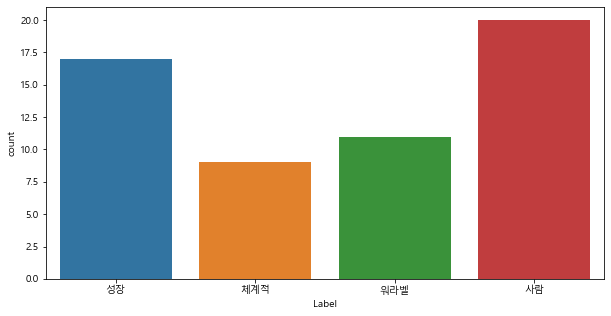

In [495]:
plt.figure(figsize=[10,5])
sns.countplot(data=df1, x='Label')

In [496]:
import konlpy
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding,SimpleRNN,LSTM
from keras.datasets import imdb
from keras import preprocessing

In [497]:
category1_comm = df1[['한줄평','Label']].rename(columns={'한줄평':'text'}).replace({'성장':1,'체계적':2,'워라벨':3,'사람':4})
category1_comm.head()

,text,Label
0,무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안에...,1.0
1,체계적인 업무분담으로 자율성을 강조하며 사내분위기로 실무를 극대화할 수 있는 좋은 회사,2.0
2,"개발자가 대우받으며 일할 수 있는곳, 워라밸 좋음",3.0
3,일하기 좋은 회사. 누구라도 잘 알고 있는 회사인만큼 실제로도 매우 만족스러운 회사...,4.0
4,무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안에...,1.0


In [498]:
cond1 = (category1_comm['Label'].isnull())
train_set = category1_comm.loc[~cond1]
test_set = category1_comm.loc[cond1]

In [499]:
X = train_set[['text']]
Y = train_set[['Label']]

X_test = test_set[['text']]
Y_test = test_set[['Label']]

print(X.shape)
print(X_test.shape)
print(Y.shape)
print(Y_test.shape)

(57, 1)
(95, 1)
(57, 1)
(95, 1)


**Text length**

In [500]:
Train_data_length = category1_comm['text'].apply(len)
Train_data_length.describe()

count    152.000000
mean      45.138158
std       22.458512
min       20.000000
25%       30.000000
50%       39.000000
75%       52.000000
max      177.000000
Name: text, dtype: float64

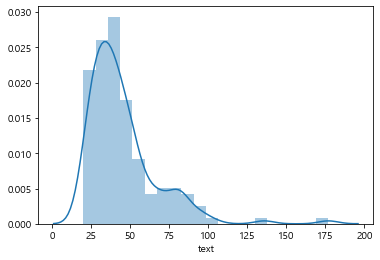

In [501]:
sns.distplot(Train_data_length)

In [502]:
okt = Okt()

In [503]:
# 불용어 또는 특수문자 제거 
clean_word = [] 
for i in X['text']:
    review_text = re.sub("[12?~3.,()''->\n]", " ", i)
    word_text = okt.morphs(review_text, stem=True)

    if True: word_text = [token for token in word_text if not token in set(['를','을','에','도'])]
        
    clean_word.append(word_text)

In [504]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_word)

train_seq = tokenizer.texts_to_sequences(clean_word)

# tokenizer.word_index

In [505]:
# 불용어 또는 특수문자 제거 
clean_word = [] 
for i in X_test['text']:
    review_text = re.sub("[12?~3.,()''->\n]", " ", i)
    word_text = okt.morphs(review_text, stem=True)

    if True: word_text = [token for token in word_text if not token in set(['를','을','에','도'])]
        
    clean_word.append(word_text)

In [506]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_word)

test_seq = tokenizer.texts_to_sequences(clean_word)

# tokenizer.word_index

In [507]:
# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
maxlen = 80

# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환합니다.
x_train_vec = pad_sequences(train_seq, maxlen=80, padding='post')
x_test_vec = pad_sequences(test_seq, maxlen=80, padding='post')

In [508]:
Y_train = Y.astype(int)

In [509]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop, SGD
from keras.utils import to_categorical
y_binary = to_categorical(Y_train)

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(Dense(7, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train_vec, Y_train,
                    epochs=75,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_56 (Embedding)     (None, 80, 8)             80000     
_________________________________________________________________
conv1d_79 (Conv1D)           (None, 74, 32)            1824      
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, 14, 32)            0         
_________________________________________________________________
conv1d_80 (Conv1D)           (None, 8, 32)             7200      
_________________________________________________________________
global_max_pooling1d_40 (Glo (None, 32)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 7)                 231       
Total params: 89,255
Trainable params: 89,255
Non-trainable params: 0
_________________________________________________

C:\Users\ainbd\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 45 samples, validate on 12 samples
Epoch 1/75
45/45 [==============================] - 0s 2ms/step - loss: 1.9340 - acc: 0.3556 - val_loss: 1.9289 - val_acc: 0.3333
Epoch 2/75
45/45 [==============================] - 0s 133us/step - loss: 1.9169 - acc: 0.3556 - val_loss: 1.9168 - val_acc: 0.3333
Epoch 3/75
45/45 [==============================] - 0s 155us/step - loss: 1.9014 - acc: 0.3556 - val_loss: 1.9041 - val_acc: 0.3333
Epoch 4/75
45/45 [==============================] - 0s 132us/step - loss: 1.8851 - acc: 0.3556 - val_loss: 1.8893 - val_acc: 0.3333
Epoch 5/75
45/45 [==============================] - 0s 134us/step - loss: 1.8676 - acc: 0.3556 - val_loss: 1.8720 - val_acc: 0.3333
Epoch 6/75
45/45 [==============================] - 0s 155us/step - loss: 1.8459 - acc: 0.3556 - val_loss: 1.8520 - val_acc: 0.3333
Epoch 7/75
45/45 [==============================] - 0s 155us/step - loss: 1.8215 - acc: 0.3556 - val_loss: 1.8287 - val_acc: 0.3333
Epoch 8/75
45/45 [================

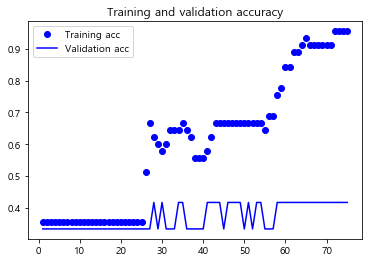

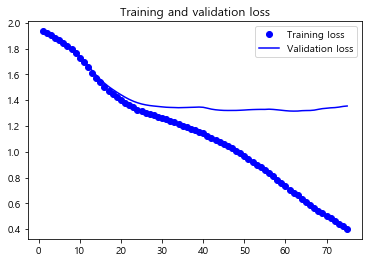

In [510]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**test Set 대입**

In [511]:
X_test['label']= model.predict_classes(x_test_vec, batch_size=32)
X_test

,text,label
57,"직원들을 위한 회사, 스타트업이기에 미숙한 부분도 있을 수 있지만 업계에서 좋은 문...",4
58,"개발자가 대우받으며 일할 수 있는 환경이며, 자유롭게 의견을 건의할 수 있다",4
59,소중한 경험이지만 아직회사가 작다는 느낌이 큽니다ㅠㅠ,1
60,개발자 우대하는 분위기인듯하고 그래서 다른 직군이 개발자만 우대하는 분위기를 조금 ...,4
61,다양한 개발환경과 함께 일하는 동료들의 수준이 높고 배울 수 있는 것이 많다.,4
...,...,...
147,조직문화가 최대 강점! 구성원 모두가 일도 잘하지만 인격적으로도 우수하신 분들이 많음,4
148,신입직으로는 사실 불행일 수도 있습니다. 이런 회사가 흔치 않으니까요.,1
149,자유롭고 편안한 분위기 미래가 보이는 곳,1
150,BEST\nIT업계치고 야근없는 회사가 있을까. 그래도 매우 만족하는 이유는 회사와...,4


In [512]:
X_test['Label'] = X_test['label'].replace({1:'성장',2:'체계적',3:'워라벨',4:'사람'})

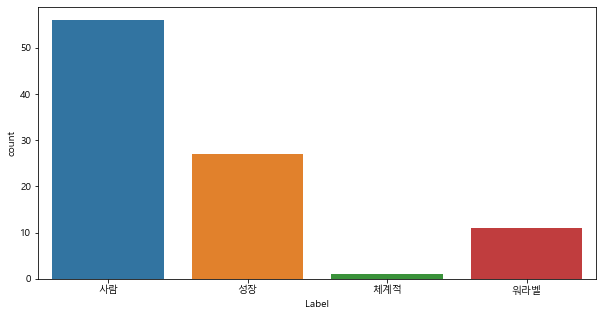

In [513]:
plt.figure(figsize=[10,5])
sns.countplot(data=X_test, x='Label', order=['사람','성장','체계적','워라벨'])

In [514]:
X_train['label'] = Y_train

In [515]:
X_train['Label'] = X_train['label'].replace({1:'성장',2:'체계적',3:'워라벨',4:'사람'})

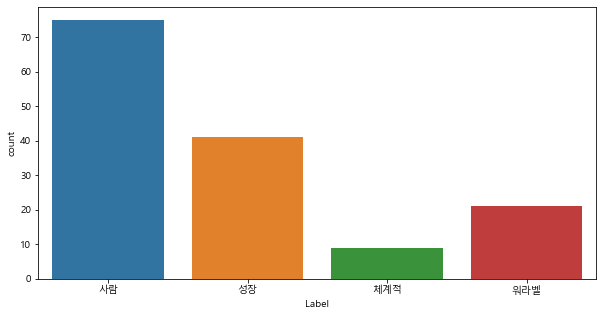

In [516]:
data = pd.concat([X_train,X_test])
plt.figure(figsize=[10,5])
sns.countplot(data=data, x='Label', order=['사람','성장','체계적','워라벨'])

**기업장점데이터 넣기**

In [517]:
X_test2 = pd.DataFrame()
X_test2['text'] = df1['기업장점']

In [518]:
# 불용어 또는 특수문자 제거 
clean_word = [] 
for i in X_test2['text']:
    review_text = re.sub("[12?~3.,()''->\n]", " ", i)
    word_text = okt.morphs(review_text, stem=True)

    if True: word_text = [token for token in word_text if not token in set(['를','을','에','도'])]
        
    clean_word.append(word_text)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_word)

test_seq = tokenizer.texts_to_sequences(clean_word)

# tokenizer.word_index

x_test_vec = pad_sequences(test_seq, maxlen=80, padding='post')

In [519]:
X_test2['label']= model.predict_classes(x_test_vec, batch_size=32)
X_test2['Label'] = X_test2['label'].replace({1:'성장',2:'체계적',3:'워라벨',4:'사람'})

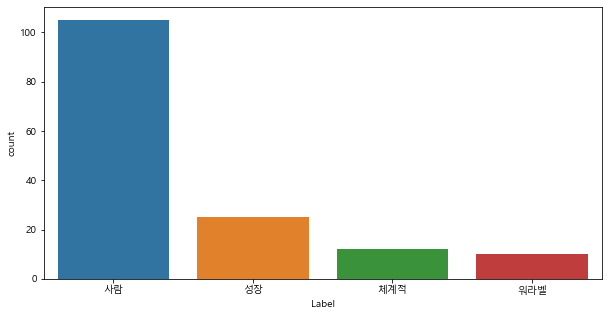

In [520]:
plt.figure(figsize=[10,5])
sns.countplot(data=X_test2, x='Label', order=['사람','성장','체계적','워라벨'])

**기업 단점 데이터 넣기**

In [521]:
X_test3 = pd.DataFrame()
X_test3['text'] = df1['기업단점']

In [522]:
# 불용어 또는 특수문자 제거 
clean_word = [] 
for i in X_test3['text']:
    review_text = re.sub("[12?~3.,()''->\n]", " ", i)
    word_text = okt.morphs(review_text, stem=True)

    if True: word_text = [token for token in word_text if not token in set(['를','을','에','도'])]
        
    clean_word.append(word_text)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_word)

test_seq = tokenizer.texts_to_sequences(clean_word)

# tokenizer.word_index

x_test_vec = pad_sequences(test_seq, maxlen=80, padding='post')

In [523]:
X_test3['label']= model.predict_classes(x_test_vec, batch_size=32)
X_test3['Label'] = X_test3['label'].replace({1:'성장',2:'체계적',3:'워라벨',4:'사람'})

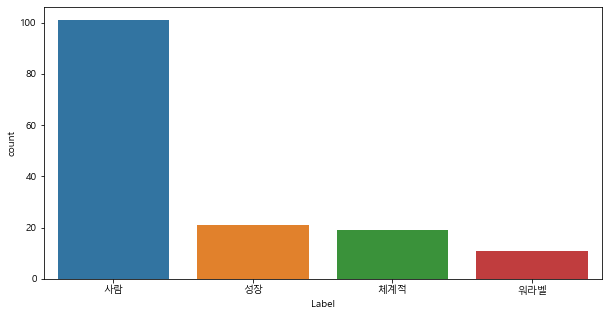

In [524]:
plt.figure(figsize=[10,5])
sns.countplot(data=X_test3, x='Label', order=['사람','성장','체계적','워라벨'])

**바라는 점 넣기**

In [525]:
X_test4 = pd.DataFrame()
X_test4['text'] = df1['바라는점']

In [526]:
# 불용어 또는 특수문자 제거 
clean_word = [] 
for i in X_test4['text']:
    review_text = re.sub("[12?~3.,()''->\n]", " ", i)
    word_text = okt.morphs(review_text, stem=True)

    if True: word_text = [token for token in word_text if not token in set(['를','을','에','도'])]
        
    clean_word.append(word_text)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_word)

test_seq = tokenizer.texts_to_sequences(clean_word)

# tokenizer.word_index

x_test_vec = pad_sequences(test_seq, maxlen=80, padding='post')

In [527]:
X_test4['label']= model.predict_classes(x_test_vec, batch_size=32)
X_test4['Label'] = X_test4['label'].replace({1:'성장',2:'체계적',3:'워라벨',4:'사람'})

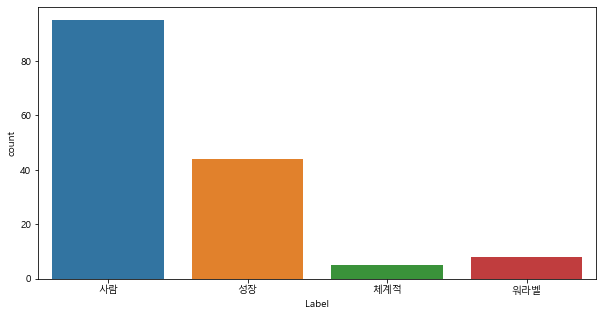

In [528]:
plt.figure(figsize=[10,5])
sns.countplot(data=X_test4, x='Label', order=['사람','성장','체계적','워라벨'])